## Introduction
In this project, I will analyze Medical Appointment No Shows Dataset and communicate my findings about it using Python libraries NumPy, pandas, Matplotlib, and seaborn. The dataset collects information from 110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.



# Questions

1.Relationship between age of patient and appointments
2.Association between hypertension and diabetes patients and appointments
3.Does sponsorship affects attendance?

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Data Gathering

In [14]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [15]:
#checking if data has been imported
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [17]:
df.shape

(110527, 14)

## Data Wrangling



### correcting the datatypes



In [18]:
#changing scheduled and appointment data type
df['ScheduledDay']=df['ScheduledDay'].astype('datetime64[ns]')
df['AppointmentDay']=df['AppointmentDay'].astype('datetime64[ns]')
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [19]:
#changing Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received' for easy analysis
t_bool=['Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

for a in t_bool:
    df[a]=df[a].astype('bool')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  bool          
 8   Hipertension    110527 non-null  bool          
 9   Diabetes        110527 non-null  bool          
 10  Alcoholism      110527 non-null  bool          
 11  Handcap         110527 non-null  bool          
 12  SMS_received    110527 non-null  bool          
 13  No-show         110527 non-null  object        
dtypes: bool(6), datetime64[ns](2), float

In [21]:
#changing no-show column to showed up and replacing Yes/No with True or False
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [22]:
df['ShowedUp']=df['No-show'].apply(lambda x: 'True' if x == 'No' else 'False') 
df['ShowedUp'].value_counts()

True     88208
False    22319
Name: ShowedUp, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  bool          
 8   Hipertension    110527 non-null  bool          
 9   Diabetes        110527 non-null  bool          
 10  Alcoholism      110527 non-null  bool          
 11  Handcap         110527 non-null  bool          
 12  SMS_received    110527 non-null  bool          
 13  No-show         110527 non-null  object        
 14  ShowedUp        110527 non-null  obj

In [24]:
#dropping no-show column
df.drop('No-show', axis=1, inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ShowedUp
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  bool          
 8   Hipertension    110527 non-null  bool          
 9   Diabetes        110527 non-null  bool          
 10  Alcoholism      110527 non-null  bool          
 11  Handcap         110527 non-null  bool          
 12  SMS_received    110527 non-null  bool          
 13  ShowedUp        110527 non-null  object        
dtypes: bool(6), datetime64[ns](2), float

In [26]:
#renaming misspelled column names and to reasonable names
df.rename(columns={'Scholarship':'Sponsorship'}, inplace=True)
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.rename(columns={'Handcap':'Handicap'}, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Sponsorship     110527 non-null  bool          
 8   Hypertension    110527 non-null  bool          
 9   Diabetes        110527 non-null  bool          
 10  Alcoholism      110527 non-null  bool          
 11  Handicap        110527 non-null  bool          
 12  SMS_received    110527 non-null  bool          
 13  ShowedUp        110527 non-null  object        
dtypes: bool(6), datetime64[ns](2), float

In [28]:
#checking duplicate values
sum(df.duplicated())

0

In [29]:
df.describe()

,PatientId,AppointmentID,Age
count,1.105270e+05,1.105270e+05,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874
std,2.560949e+14,7.129575e+04,23.110205
min,3.921784e+04,5.030230e+06,-1.000000
25%,4.172614e+12,5.640286e+06,18.000000
50%,3.173184e+13,5.680573e+06,37.000000
75%,9.439172e+13,5.725524e+06,55.000000
max,9.999816e+14,5.790484e+06,115.000000


In [30]:
# from the above description, the mean age is -1 which is an invalid age and needs to be dropped
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Sponsorship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ShowedUp
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,False,False,False,False,False,False,True


In [31]:
df.drop(99832,axis=0, inplace=True)

In [52]:
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Sponsorship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ShowedUp,AgeGroup


In [53]:
#age groupings
df['AgeGroup']=pd.cut(x=df['Age'], bins=[0,14,24,64,115], labels=['Children', 'Youth', 'Adults','Seniors'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Sponsorship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ShowedUp,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,Adults
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,Adults
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,Adults
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,Children
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,Adults


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  float64       
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  object        
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   Age             110526 non-null  int64         
 6   Neighbourhood   110526 non-null  object        
 7   Sponsorship     110526 non-null  bool          
 8   Hypertension    110526 non-null  bool          
 9   Diabetes        110526 non-null  bool          
 10  Alcoholism      110526 non-null  bool          
 11  Handicap        110526 non-null  bool          
 12  SMS_received    110526 non-null  bool          
 13  ShowedUp        110526 non-null  object        
 14  AgeGroup        106987 non-null  cat

In [55]:
#It appears that the AgeGroup contains some null values
# finding and fixing null values

df[df['AgeGroup'].isnull()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Sponsorship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ShowedUp,AgeGroup
59,7.184428e+13,5638545,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,False,False,False,False,False,False,True,NaN
63,2.366233e+14,5628286,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,False,False,False,False,False,False,True,NaN
64,1.885174e+14,5616082,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,False,False,False,False,False,True,True,NaN
65,2.718818e+14,5628321,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,False,False,False,False,False,False,True,NaN
67,8.647128e+13,5639264,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,False,False,False,False,False,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16 12:30:58,2016-06-01,0,RESISTÊNCIA,False,False,False,False,False,False,True,NaN
110346,5.577525e+12,5777724,M,2016-06-06 14:22:34,2016-06-08,0,RESISTÊNCIA,False,False,False,False,False,False,True,NaN
110454,6.142460e+11,5772400,F,2016-06-03 15:18:44,2016-06-03,0,RESISTÊNCIA,False,False,False,False,False,False,True,NaN
110460,4.321846e+13,5769545,F,2016-06-03 08:56:51,2016-06-03,0,RESISTÊNCIA,False,False,False,False,False,False,True,NaN


In [56]:
#it appears that age 0 was not grouped. Hence they will be added to children
#confirming if the count of 0 is the same as the null value
df['AgeGroup'].isnull().sum()==df[df['Age']== 0]['Age'].count()

True

In [57]:
#replacing the null group
df['AgeGroup'].fillna('Children', inplace=True)
df['AgeGroup'].value_counts()

Adults      58857
Children    23257
Seniors     14402
Youth       14010
Name: AgeGroup, dtype: int64

In [72]:
#checking if the error has been fixed
df[df['AgeGroup'].isnull()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Sponsorship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ShowedUp,AgeGroup


## Visualization

a function to take variable name and group data by selected variable and patients count and a preferred plot type

In [59]:
def myplot(s,d):
    """using patient id as an index counter 
    """
    df.groupby([s])['PatientId'].count().plot(kind=d)
    plt.title(('Patients per '+ s))
    plt.xlabel(s)
    plt.ylabel('Total Number of Patients')
    b=df.groupby([s])['PatientId'].count()
    print(b)

Alcoholism
False    107166
True       3360
Name: PatientId, dtype: int64


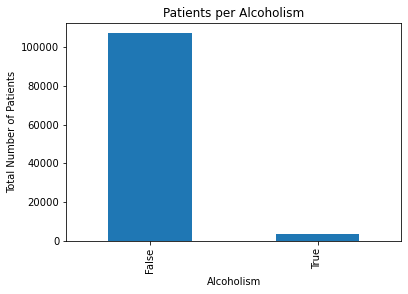

In [60]:
myplot('Alcoholism','bar' )

from the above graph, most patients do not suffer from Alcoholism i.e, 107166 of the total patients whiles 3360 do suffer from Alcoholism

Gender
F    71839
M    38687
Name: PatientId, dtype: int64


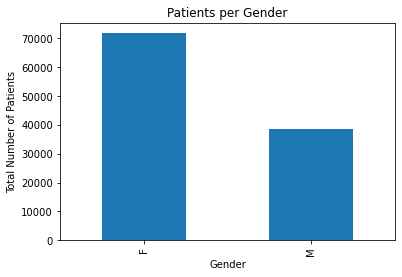

In [61]:
myplot('Gender','bar')

The graph above shows that 71839 females and 38687 males consistute to the enter data

# appointment analysis

<AxesSubplot:title={'center':'PATIENT APPOINTMENT'}, ylabel='ShowedUp'>

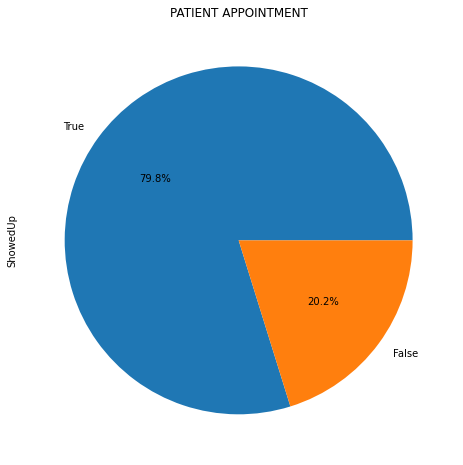

In [62]:
df['ShowedUp'].value_counts().plot(kind ='pie', autopct='%1.1f%%', figsize=[8,8], title='PATIENT APPOINTMENT')

from the above chart, 79.8% of the scheduled appointments attended while the remaining 20.2% was not honored

In [63]:
#exploring honored appointment
HonoredAppointment = df[df['ShowedUp']=='True']
HonoredAppointment['PatientId'].count()


88207

In [64]:
#age group of honored appointments
HonoredAgeGroup= HonoredAppointment['AgeGroup'].value_counts()
HonoredAgeGroup

Adults      47237
Children    18331
Seniors     12169
Youth       10470
Name: AgeGroup, dtype: int64

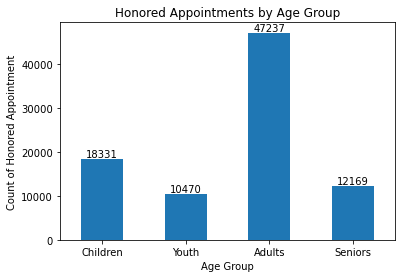

In [65]:
#showing findings on a bar chart
order = ['Children', 'Youth','Adults','Seniors']
plot = HonoredAgeGroup.reindex(order).plot(kind='bar', rot = 0, title = 'Honored Appointments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Honored Appointment')

for bars in plot.patches:
    plt.text(bars.get_x() + bars.get_width()/2, bars.get_height(), bars.get_height(),
             ha='center', va='bottom');

The graph above shows that majority of the appointments were honored by Adults, followed by children then Seniors and Youth has the lowest

<AxesSubplot:title={'center':'Honored Appointment By Age Group'}, ylabel='AgeGroup'>

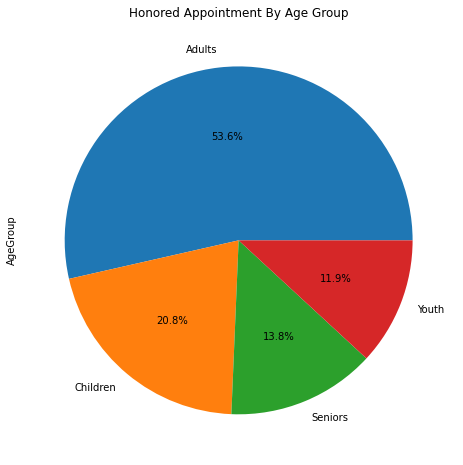

In [66]:
HonoredAgeGroup.plot(kind='pie', title='Honored Appointment By Age Group', autopct='%1.1f%%', figsize=[8,8])

From the chart above, most appointments were scheduled by adults (24-64 years) with 53.6%, followed by Children(20.8%), Seniors at 13.8% and Youth at 11.9%

In [67]:
#finding patients who attended appointment based on their health conditions
#hypertension
HypShow = df.groupby('Hypertension')['ShowedUp'].value_counts().unstack('ShowedUp')
HypShowT = HypShow.loc[True].rename('Hypertension').to_frame()
HypShowT

,Hypertension
ShowedUp,
False,3772
True,18029


In [68]:
#dibetes
DiabShow = df.groupby('Diabetes')['ShowedUp'].value_counts().unstack('ShowedUp')
DiabShowT = DiabShow.loc[True].rename('Diabetes').to_frame()
DiabShowT

,Diabetes
ShowedUp,
False,1430
True,6513


In [69]:
#JOINING BOTH TABLES
BT= DiabShowT.join(HypShowT)
BT

,Diabetes,Hypertension
ShowedUp,,
False,1430,3772
True,6513,18029


<AxesSubplot:title={'center':'Patient with Diabetes and Hypertension that showed up vs did not show up'}, xlabel='ShowedUp'>

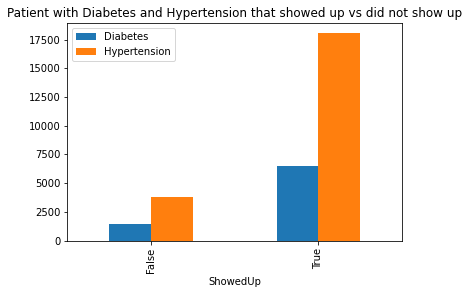

In [70]:
#plotting a bar chat to show the above table
BT.plot(kind='bar',title ='Patient with Diabetes and Hypertension that showed up vs did not show up')

The above graph shows that people with hypertension most attend appointments as they are the majority. Moreover Diabetes patients do less attend appointments looking at the population.

<Figure size 576x576 with 0 Axes>

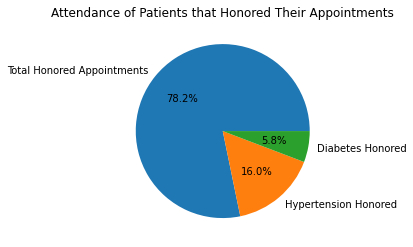

<Figure size 576x576 with 0 Axes>

In [71]:
TotalHonoredApp = HonoredAppointment['PatientId'].count()
HShow = 18029
DShow = 6513

HA_list = [TotalHonoredApp,HShow,DShow]
labels = ['Total Honored Appointments', 'Hypertension Honored', 'Diabetes Honored']

plt.title('Attendance of Patients that Honored Their Appointments')
plt.pie(HA_list, labels= labels, autopct='%1.1f%%')
plt.figure(figsize=[8,8])

# conclusions

###### 1.Relationship between age of patient and appointments

From the analysis we can see that 88207(79.8%) appointments out of the total of 110,526 scheduled appointments were honored, and analysing the total appointments honored(79.8%) by age group, the number of scheduled appointments honored by the adult group is 47,237 appointments (53.6%), children group has a total of 18331 appointments (20.8%) honored, seniors group has a total of 12169 appointments (13.8%) honored appointments and finally youth has a total of 10470 (11.9%) missed appointments. This tells us that the adult group (24-64 years) has the highest honored appointments.

###### 2.Association between hypertension and diabetes patients and appointments

Out of a total of 79.8 honored appointments, patients with Hypertension accounted for only 13.7% of the total appointments missed, while patients with diabetes accounted 5.2% of the missed scheduled appointments. Other features contribute about 81% of the total missed scheduled appointments. This leads us to conclude that Patients with Hypertension and Diabetes does not significantly contribute to the total scheduled appointments missed.

## Limitation

The data does not show multiple variables asa patient denstiy to the whole population in certain areas. Marital, employment status would have been good variables to add. The data was only limited to one country.